- - - -
# Mechpy
a mechanical engineer's toolbox   

To view this notebook, use the [nbviewer](http://nbviewer.jupyter.org/github/nagordon/mechpy/blob/master/mechpy.ipynb)
- - - -



### Modules


## 1) [Statics](#Statics)
* [Example 1: A simple supported beam with shear-bending plots](#Statics-Example-1)
* [Example 2: Vector calculation method to calculate 3-D moments](#Statics-Example-2)
* [Distributed Loads Calculations](#Distributed-Loads-Calculations)

## 2) [Materials](#Materials)
* [composite mechanics](#Composite-Mechanics)


## 3) Kinematics
* [double_pendulum](http://matplotlib.org/examples/animation/double_pendulum_animated.html)


## 4) Dynamics 
* [dynamics](#Dynamics)
* [Python Vibration Codes](http://vibrationdata.com/software.htm)
* [Dynamics Notes](#Dynamics-Vibrations-Notes)

## 5) Design
* [Factors of Safety](#(Factors-of-Safety)  


## Appendix A: [Engineering Mathematics with Python](#Engineering-Mathematics-with-Python)
[Differential Equations](#Differential-Equations)  
[Linear Algebra](#Linear-Algebra)  
[Signal Processing](#Signal-Processing)  
[Finite Element Method](#Finite-Element-Method)
* [solids FEM example](#FEM-Example-1)   

[Units](#Units)    

- - - -
- - - -

## References
Hibbler - Statics  
Hibbler - Mechanics of Materials  
Mechanical Design of Machine Elements and Machines - Collins et al
Practical Stress Analysis for Design Engineers - Flabel
Aircraft Structures - Peery
Airframe Stress Analysis and Sizing - Niu


In [69]:
!jupyter nbconvert --to html mechpy.ipynb

[NbConvertApp] Converting notebook mechpy.ipynb to html
[NbConvertApp] Writing 1207968 bytes to mechpy.html


## Python Initilaization with module imports

In [2]:
# setup 
import numpy as np
import sympy as sp
import scipy
from pprint import pprint
sp.init_printing(use_latex='mathjax')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)  # (width, height)
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 16
from matplotlib import patches

get_ipython().magic('matplotlib')  # seperate window
get_ipython().magic('matplotlib inline') # inline plotting

Using matplotlib backend: Qt4Agg


- - - -
# Statics 
[index](#Mechpy)
- - - -

The sum of the forces is zero
$$
\Sigma F_x =0 , \Sigma F_y =0 , \Sigma F_z =0  
$$
The sum of the moments is zero
$$
\Sigma M_x =0 , \Sigma M_y =0 , \Sigma M_z =0  
$$

Dot Product

$$
\vec{A} \bullet \vec{B} = ABcos\left(\theta\right)= A_xB_x + A_yB_y+A_zB_z
$$

Cross-Product

$$
\vec{C}=\vec{A} \times \vec{B} = 
\begin{vmatrix}
    \widehat{i} & \widehat{j} & \widehat{k}\\
    A_{x} & A_{y} & A_{z}\\
    B_{x} & B_{y} & B_{z}
\end{vmatrix} 
$$

Moment of Force
$$
M_0 = Fd \\
\vec{M_0}=\vec{r}\times \vec{F} = 
\begin{vmatrix}
    \widehat{i} & \widehat{j} & \widehat{k}\\
    r_{x} & r_{y} & r_{z}\\
    F_{x} & F_{y} & F_{z}
\end{vmatrix} 
$$

Moment of Force about a Specified axis
$$
\vec{M_a}=\vec{u}\bullet\vec{r}\times \vec{F} = 
\begin{vmatrix}
    u_{x} & u_{y} & u_{z} \\
    r_{x} & r_{y} & r_{z} \\
    F_{x} & F_{y} & F_{z}
\end{vmatrix} 
$$


### Statics-Example 1
#### A simple supported beam with shear-bending plots

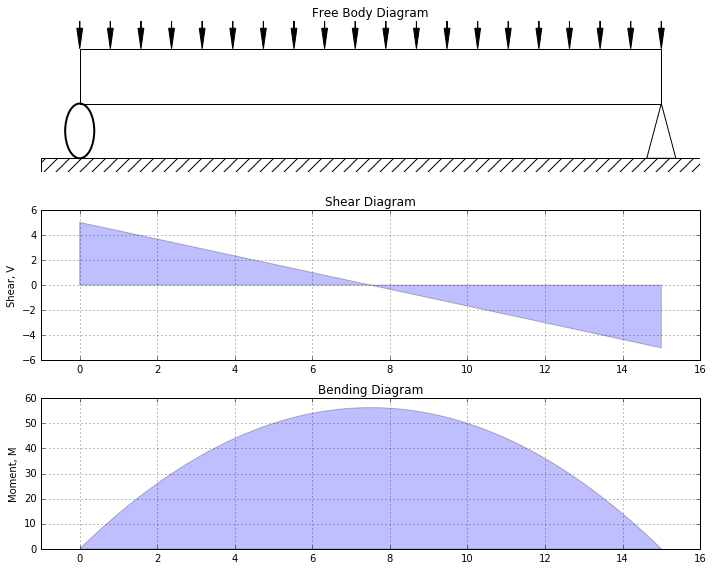

In [7]:
from mechpy.statics import simple_support
simple_support()

### Statics-Example 2
### Vector calculation method to calculate 3-D moments

$
\vec{M_{R_0}}=\Sigma \left( \vec{r} \times \vec{F} \right) = \vec{r_A}\times\vec{F_1} +\vec{r_A}\times\vec{F_2} + \vec{r_B}\times\vec{F_3}
$

Total Moment vector
[ 30 -40  60]
Total Force Vector about point O
[ 20 130 -10]
unit vector of the moment
[ 0.38411064 -0.51214752  0.76822128]
angles at which the moments react
[  67.41146121  120.80698112   39.80557109]


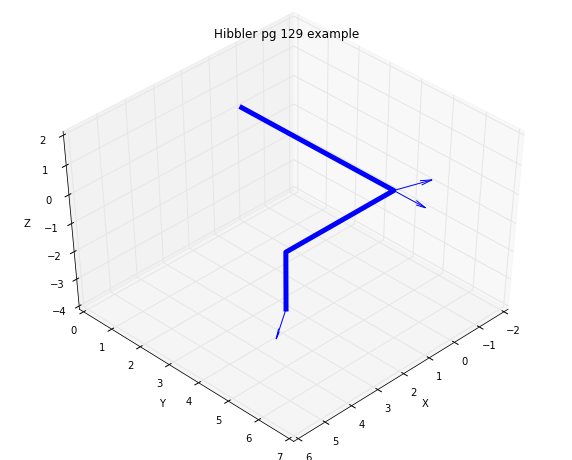

In [8]:
from mechpy.statics import moment_calc
moment_calc()

### Distributed Loads Calculations

$
F_R = \Sigma F=\int_L w(x) \,dx  = \int_A dA \,dx  
$

example, hibbler, pg 187

$$
F_R=\int_A dA \, =  \int_{0}^{2} \, 60x^2 \, dx = 160 N
$$

$$
 \overline{x} = \frac{\int_A x \, dA}{\int_A dA} =  \frac{\int_{0}^{2} x60x^2 \, dx}{\int_{0}^{2} \, 60x^2 \, dx} = \frac{240}{160}
$$

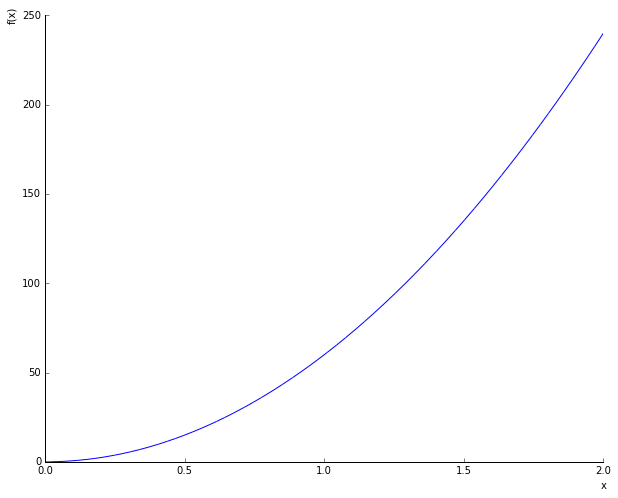

In [9]:
x = sp.var('x')
w = 60*x**2# N/m
sp.plot(w, (x,0,2));

In [6]:
w.subs(x,2)

240

In [7]:
sp.Integral(w,(x,0,2))

2         
⌠         
⎮     2   
⎮ 60⋅x  dx
⌡         
0         

In [8]:
sp.integrate(w)

    3
20⋅x 

In [9]:
sp.integrate(w,(x,0,2))

160

In [10]:
sp.Integral(x*w,(x,0,2))

2         
⌠         
⎮     3   
⎮ 60⋅x  dx
⌡         
0         

In [11]:
sp.integrate(w*x)

    4
15⋅x 

In [12]:
sp.integrate(x*w,(x,0,2))

240

In [13]:
FR= float(sp.integrate(w,(x,0,2)))
xbar = float(sp.integrate(x*w,(x,0,2)))/FR
print('center of load of an exponential distributed load is %f' % xbar)

center of load of an exponential distributed load is 1.500000


In [14]:
#hibbler pg 346

import numpy as np

r = np.array([    0, 3 , 5.25])
F = np.array([-13.5, 0 ,6.376])
M = -np.cross(r,F)

# moments 
print('M_x = %f \nM_y = %f \nM_z = %f' % (M[0], M[1], M[2] ))

M_x = -19.128000 
M_y = 70.875000 
M_z = -40.500000


# Materials
[index](#Mechpy)

## Stress and Strain
Stress is a tensor that can be broken into 

$$
\overline{\sigma}=\begin{bmatrix}
 \sigma_{xx} & \sigma_{xy} & \sigma_{xz}\\
 \sigma_{yx} & \sigma_{yy} & \sigma_{yz}\\
 \sigma_{zx} & \sigma_{zy} & \sigma_{zz}
 \end{bmatrix} 
$$



## Factors of safety
In aerospace, typically 1.2 for civilian aircraft and 1.15 for military

$$FS=\frac{\sigma_{yield}}{\sigma}-1$$  

## Fastener Notes and Formulas

Finding the centroid of a bolt with coordinates, $\overline{x},\overline{y}$
$$ \overline{x}=\frac{\sum_{i=1}^{n_b}{A_i x_i} }{\sum_{i=1}^{n_b}{A_i} } \ \ \overline{y}=\frac{\sum_{i=1}^{n_b}{A_i y_i} }{\sum_{i=1}^{n_b}{A_i}}$$

Joint/Polar Moment of Inertia, $r=$ distance from centroid to fastener
$$J= \int{r^2dA}= \sum_{i=1}^{n_b}{A_k r_k^2}$$

Bearing Stress on a bolt
$$\sigma^i_{bearing}=\frac{V_{max}}{Dt}$$

Shear Stress on each bolt i due to shear force
$$\tau_f^i = \frac{P}{\sum_{i=1}^{n_b}{A_i} }$$  
Where $A_i=$ the area of ith bolt, $n_b=$number of bolts, and $P=$ shear force

Shear Stress on each bolt i due to moment
$$\tau_t^i = \frac{T r_i}{J} $$  

### Modes of failure of fastened Joints
1. Tensile Plate Failure across the net section between rivets/bolts
2. Failure of rivets through shear
3. Compression failure between rivet and plate
4. Edge shear-out at rivet hole
5. Edge tearing at rivet hole

#### 1.

$$\sigma_t =\frac{F_s}{(b-nd)t}$$

#### 2.

#### 3.

#### 4.

#### 5.



## Adhesive Joints

With members, or adherends, joined with adhesives, either the member will fail due to tensile loads or the adhesive will fail in shear.

The simple solution to finding the stress of bonded surfaces is taking the average stress
$$\tau_{avg}=\frac{P}{bL}$$, is not an accurate way to model maximum stress. A good rule of thumb based on the calculations below is 
$$\tau_{max}=2.08\tau_{avg}$$

The maximum shearing stress of an adhesive layer, $\tau_{max}$, can be computed as 
$$\tau_{max}=K_s\tau_{avg}=K_s\left(\frac{P}{bL_L}\right)$$
with $P$ as applied load, $b$ as the width ofthe adhesive layer, and $L_L$ as the length ofthe adhesive layer. The stress distribution factor, $K_s$, can be defined as $K_s=\frac{cL}{tanh(CL/2)}$ where $c=\sqrt{\frac{2G_a}{Et_mt_a}}$, where the shear modulus, $G_a=\frac{\tau}{\gamma}$, and $E$ as the modulus of elasticity.


The max shearing stress, $\tau_{max}$ in a scarf joint can be found with 
$$\tau_{max}=K_s\tau_{avg}=K_s\left[ \frac{Pcos\theta}{\left(\frac{bt}{sin\theta} \right)  } \right] = K_s\left(  \frac{P}{bt} sin\theta cos\theta \right)$$
where $t$ is the thickness of the adherend members and $\theta=tan^{-1}\frac{t}{L_s}$ is the scarf angle

*Mechanical Design of Machine Elements and Machines by Collins, Jack A., Busby, Henry R., Staab, George H. (2009)*

In [8]:
%matplotlib inline

,Fastener,x,y,x^2,y^2,xbar,ybar
0,0,0,0,0,0,1.5,0.5
1,1,1,0,1,0,1.5,0.5
2,2,2,0,4,0,1.5,0.5
3,3,3,0,9,0,1.5,0.5
4,4,0,1,0,1,1.5,0.5
5,5,1,1,1,1,1.5,0.5
6,6,2,1,4,1,1.5,0.5
7,7,3,1,9,1,1.5,0.5


C:\Users\ngordon\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


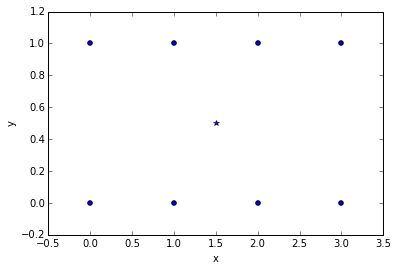

In [7]:
## Bolted Joint Example

# fastener Location
from mechpy.design import fastened_joint
fx = [0,1,2,3,0,1,2,3]
fy = [0,0,0,0,1,1,1,1]
# Force magnitude(x,y)
P = [-300,-500]
# Force location
l = [2,1]
df = fastened_joint(fx, fy, P, l)

df.plot(kind='scatter', x='x', y='y');
#df.plot(style='o', x='x', y='y')
plt.plot(df.xbar[0],df.ybar[0],'*')
df
#ax = plt.gca()
#ax.arrow(l[0], l[1], Pnorm[0],Pnorm[1], head_width=0.05, head_length=0.1, fc='k', ec='k')
#x.arrow(xbar, ybar, Pnorm[0],0, head_width=0.05, head_length=0.1, fc='k', ec='k')
#ax.arrow(xbar, ybar, 0,Pnorm[1], head_width=0.05, head_length=0.1, fc='k', ec='k')

## Composite Mechanics
[index](#Mechpy)

In [31]:
from mechpy.math import T3rot, T6rot
from mechpy.composites import qbar_transformtion, composite_plate, vary_ply_direction_plot, laminate_gen

In [33]:
from mechpy.math import T2rot
T2rot(45)

array([[ 0.52532199, -0.85090352],
       [ 0.85090352,  0.52532199]])

In [34]:
T6rot(45,45,45)

matrix([[ 0.25      ,  0.25      ,  0.5       , -0.35355339, -0.35355339,
          0.25      ],
        [ 0.02144661,  0.72855339,  0.25      ,  0.4267767 , -0.0732233 ,
         -0.125     ],
        [ 0.72855339,  0.02144661,  0.25      , -0.0732233 ,  0.4267767 ,
         -0.125     ],
        [-0.25      , -0.25      ,  0.5       ,  0.35355339,  0.35355339,
          0.75      ],
        [ 0.85355339, -0.14644661, -0.70710678,  0.35355339, -0.35355339,
          0.35355339],
        [-0.14644661,  0.85355339, -0.70710678, -0.35355339,  0.35355339,
          0.35355339]])

In [1]:
from IPython.html.widgets import *

plt.figure(figsize=(12,8))
x = [-1,1, 0,-1,]
y = [-1,-1,1,-1]
xy = np.array([x,y])
plt.xlim([-11.1,11.1])
plt.ylim([-11.1,11.1])
xyR = np.dot(T2rot(30),xy)
#plt.plot(xyR[0,:],xyR[1,:])
def rot2(th, xt,yt,zt):
    xyR = np.dot(T2rot(th),xy*zt)
    xyR[0,:]+=xt
    xyR[1,:]+=yt
    plt.plot(xyR[0,:],xyR[1,:])
    plt.axis('square')
    plt.xlim([-11.1,11.1])
    plt.ylim([-11.1,11.1])    
    plt.show()

interact(rot2, th=(0,np.pi,np.pi/90), yt=(1,10,1), xt=(1,10,1), zt=(1,10,1));

C:\Users\ngordon\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


NameError: name 'plt' is not defined

In [39]:
print(T6rot(45,45,45))

[[ 0.25        0.25        0.5        -0.35355339 -0.35355339  0.25      ]
 [ 0.02144661  0.72855339  0.25        0.4267767  -0.0732233  -0.125     ]
 [ 0.72855339  0.02144661  0.25       -0.0732233   0.4267767  -0.125     ]
 [-0.25       -0.25        0.5         0.35355339  0.35355339  0.75      ]
 [ 0.85355339 -0.14644661 -0.70710678  0.35355339 -0.35355339  0.35355339]
 [-0.14644661  0.85355339 -0.70710678 -0.35355339  0.35355339  0.35355339]]


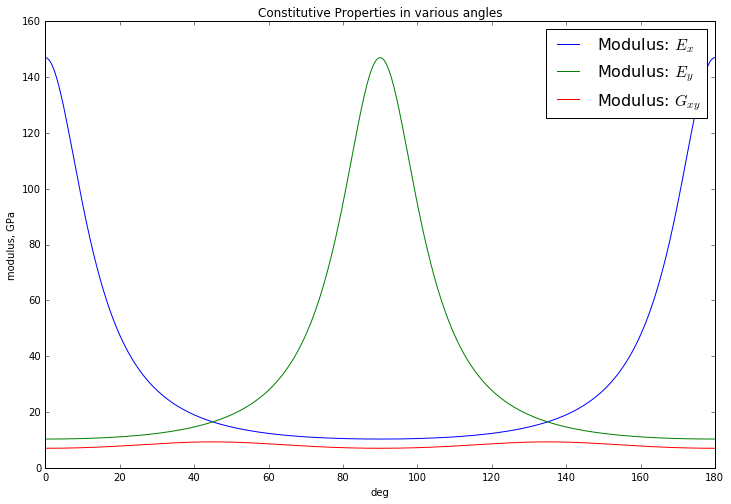

In [18]:
vary_ply_direction_plot()

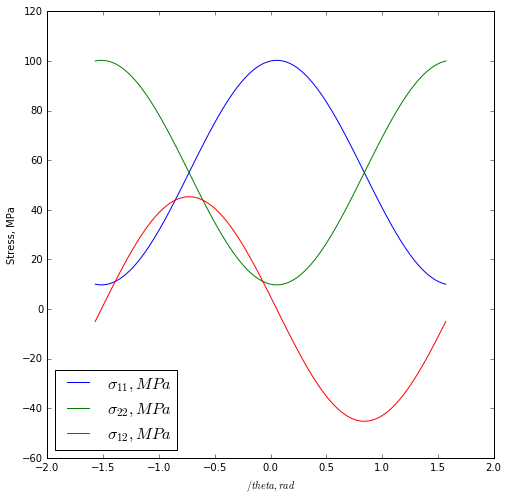

C:\Users\Neal\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


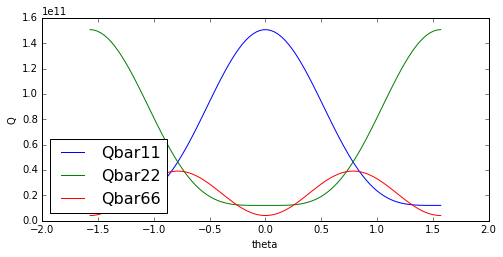

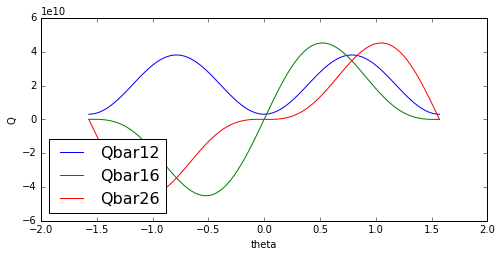

In [19]:
qbar_transformtion()

In [20]:
help(laminate_gen)

Help on function laminate_gen in module mechpy.composites:

laminate_gen(lamthk=1.5, symang=[45, 0, 90], plyratio=2.0, matrixlayers=False, nonsym=False)
    ## function created to quickly create laminates based on given parameters
    lamthk=1.5    # total #thickness of laminate
    symang = [45,0,90, 30]  #symmertic ply angle
    plyratio=2.0  # lamina/matrix
    matrixlayers=False  # add matrix layers between lamina plys
    nonsym=False    # symmetric
    
    #ply ratio can be used to vary the ratio of thickness between a matrix ply
         and lamina ply. if the same thickness is desired, plyratio = 1, 
         if lamina is 2x as thick as matrix plyratio = 2



In [21]:
laminate_gen()

([0.25, 0.25, 0.25, 0.25, 0.25, 0.25], [45, 0, 90, 90, 0, 45], [3.0, 3.0, 3.0,
 3.0, 3.0, 3.0], [45, 0, 90, 90, 0, 45])

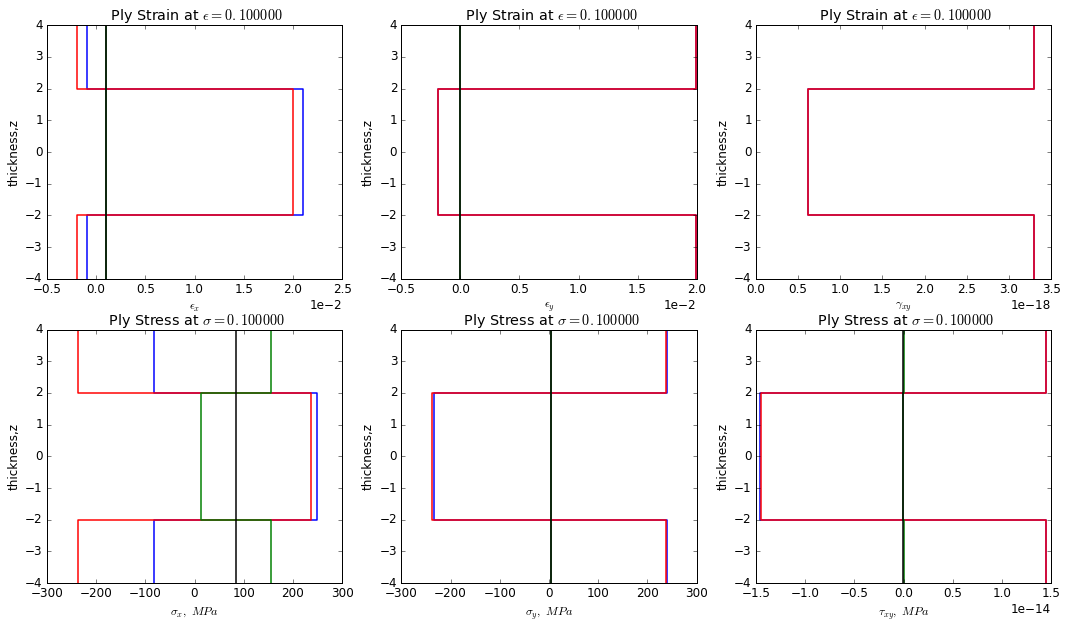

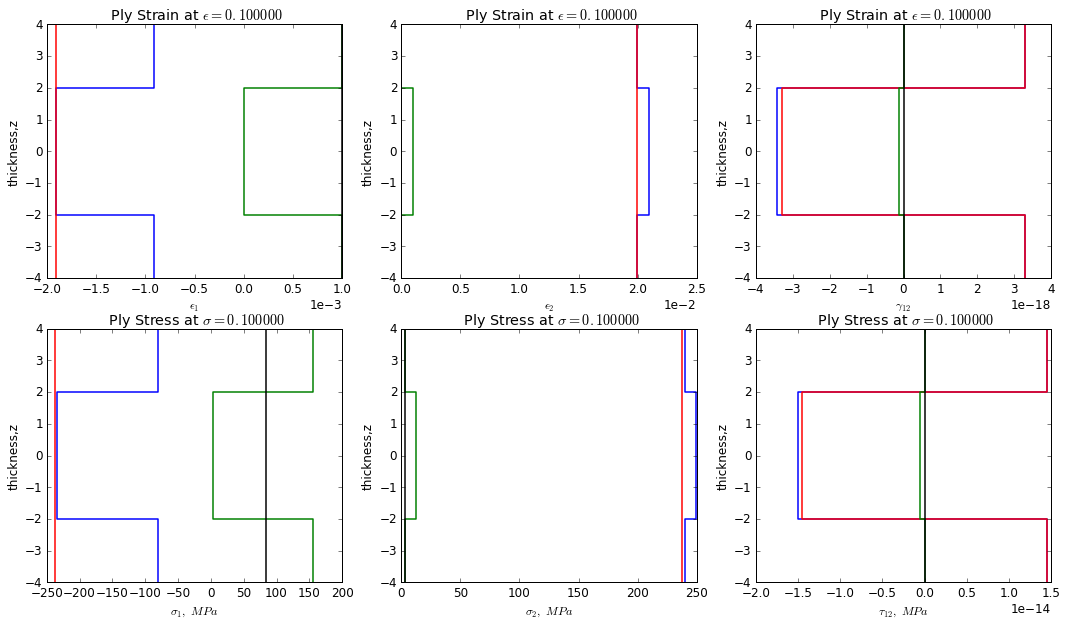

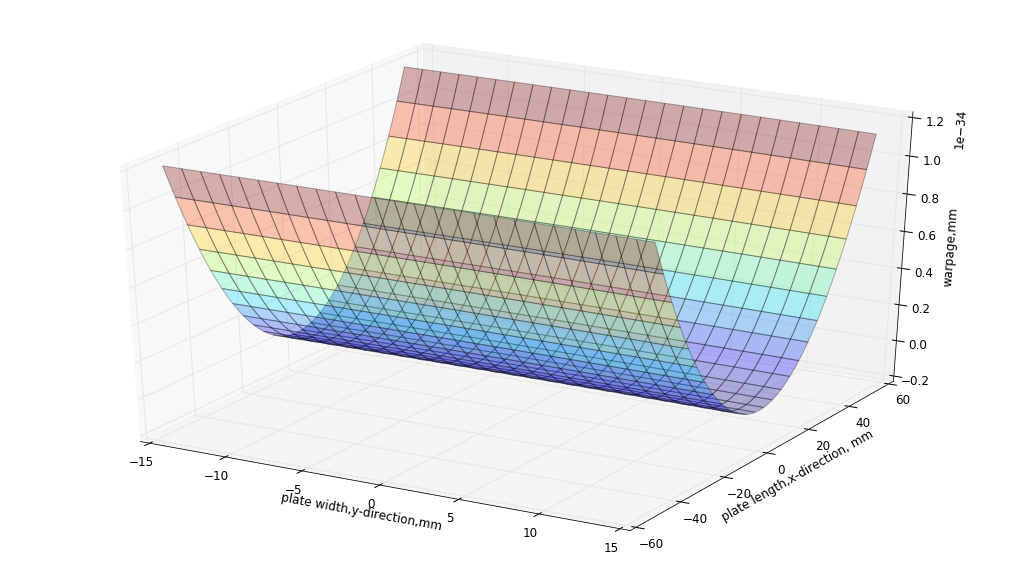

---------------Stress analysis of fibers----------
83844.7849024
83844.7849024
4400.0
[[  6.71624658e+05   2.41222175e+04  -8.40349147e-14]
 [  2.41222175e+04   6.71624658e+05   3.52532979e-11]
 [ -8.40349147e-14   3.52532979e-11   3.52000000e+04]]
[[  2.10342034e-06]
 [  2.10342034e-06]
 [ -3.66667164e-21]]
0.0359162178336


In [22]:
composite_plate()

# Stress Transformations
[index](#Index)  

$$
\overline{\sigma}=\begin{bmatrix}
 \sigma_{xx} & \sigma_{xy} & \sigma_{xz}\\
 \sigma_{yx} & \sigma_{yy} & \sigma_{yz}\\
 \sigma_{zx} & \sigma_{zy} & \sigma_{zz}
 \end{bmatrix} 
$$

reduce to plane stress

$$
\overline{\sigma}=\begin{bmatrix}
 \sigma_{xx} & \sigma_{xy} & 0 \\
 \sigma_{yx} & \sigma_{yy} & 0\\
 0 &           0 &           \sigma_{zz}
 \end{bmatrix} 
$$

or

$$
\overline{\sigma}=\begin{bmatrix}
 \sigma_{xx} & \tau_{xy} & 0 \\
 \tau_{yx} & \sigma_{yy} & 0\\
 0 &           0 &           \sigma_{zz}
 \end{bmatrix} 
$$


$$
\overline{\sigma}=\begin{bmatrix}
 \sigma_{x} & \sigma_{xy} \\
 \sigma_{yx} & \sigma_{y} \\
 \end{bmatrix} 
$$

Transformation

$$
A=\begin{bmatrix}
 cos(\theta) & sin(\theta) \\
 -sin(\theta) & cos(\theta) \\
 \end{bmatrix} 
$$

$$
\sigma'=A \sigma A^T
$$


$$
\sigma_1 , \sigma_2 = \frac{\sigma_{x}}{2} + \frac{\sigma_{y}}{2} + \sqrt{\tau_{xy}^{2} + \left(\frac{\sigma_{x}}{2} - \frac{\sigma_{y}}{2}\right)^{2}}
$$


$$
T=\left[\begin{matrix}\sin^{2}{\left (\theta \right )} & \cos^{2}{\left (\theta \right )} & 2 \sin{\left (\theta \right )} \cos{\left (\theta \right )}\cos^{2}{\left (\theta \right )} & \\
\sin^{2}{\left (\theta \right )} & - 2 \sin{\left (\theta \right )} \cos{\left (\theta \right )}\- \sin{\left (\theta \right )} \cos{\left (\theta \right )} & \\
\sin{\left (\theta \right )} \cos{\left (\theta \right )} & \sin^{2}{\left (\theta \right )} - \cos^{2}{\left (\theta \right )}\end{matrix}\right]
$$

In [3]:
import sympy as sp
from sympy.abc import tau, sigma
import numpy as np
sp.init_printing()

\frac{\sigma_{x}}{2} + \frac{\sigma_{y}}{2} + \sqrt{\tau_{xy}^{2} + \left(\frac{\sigma_{x}}{2} - \frac{\sigma_{y}}{2}\right)^{2}}


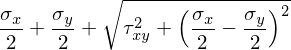

In [4]:
sx,sy,txy,tp = sp.symbols('sigma_x,sigma_y,tau_xy,theta_p')
sp1 = (sx+sy)/2 + sp.sqrt( ((sx-sy)/2)**2 + txy**2 )
sp2 = (sx+sy)/2 - sp.sqrt( ((sx-sy)/2)**2 + txy**2 )
print(sp.latex(sp1))
sp1

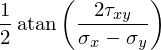

In [5]:
tp = sp.atan(2*txy/(sx-sy) )/2
tp

In [6]:
tpp = tp.evalf(subs={sx:10,sy:15,txy:10})
tpp

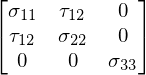

In [7]:
#s,s11,s22,s33,s12 = sp.var('s,s11,s22,s33,s12')
s,s11,s22,s33,s12,s13,t,t12 = sp.symbols('sigma, sigma11,sigma22,sigma33,sigma12,sigma13,tau,tau12')
s = sp.Matrix([[s11,t12,0],[t12,s22,0],[0,0,s33]])
s

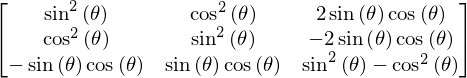

In [8]:
t = sp.symbols('theta')
m = sp.sin(t)
n = sp.cos(t)
T = sp.Matrix([[m**2,n**2, 2*m*n],[n**2,m**2,-2*m*n],[-m*n,m*n,m**2-n**2]])
T

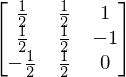

In [9]:
T1 = T.subs(t, sp.pi/4)
T1

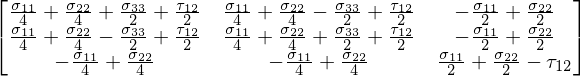

In [10]:
sprime = T1 * s * T1.inv()
sprime

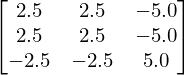

In [11]:
sprime.evalf(subs={s11:10, s22:00, s33:0, t12:0})

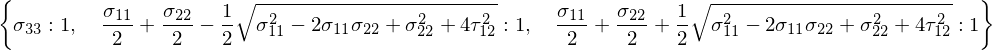

In [12]:
s.eigenvals() 

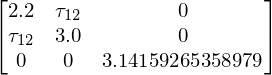

In [13]:
s2 = s.evalf(subs={s11:2.2, s22:3, s33:sp.pi, s12:7.3})
s2

In [14]:
sigma = np.array([[90,60],
                  [60,-20]])
np.linalg.eigvals(sigma)

array([ 116.39410298,  -46.39410298])

In [15]:
# PLane Stress

tauxy = 1    # lbs/in 
sigmax = 0   # lbs/in
sigmay = 0   # lbs/in

sigma = np.array([[sigmax, tauxy,0],
                  [tauxy,   sigmay,0],
                 [0,0,0]])

sigmap = np.linalg.eig(sigma)[0]
print(sigmap)

thetap = np.linalg.eig(sigma)[1]  # degrees

print('cosine angle')
print(thetap )  # cosine angle

print('plane angle')
print(np.arccos(thetap)*180/np.pi)

[ 1. -1.  0.]
cosine angle
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]
plane angle
[[  45.  135.   90.]
 [  45.   45.   90.]
 [  90.   90.    0.]]


In [16]:
# maximum in-plane shear stress
eps = 1e-16   # machine epsilon to avoid divide-by-zero error
rad_to_deg = 180/np.pi
theta1 = 0.5 * np.arctan( 2*tauxy / ((sigmax-sigmay+eps))) * rad_to_deg
print(theta1)

45.0


In [17]:
tauxy = 0    # lbs/in 
sigmax = 100   # lbs/in
sigmay = np.linspace(0,1.100)   # lbs/in

eps = 1e-16   # machine epsilon to avoid divide-by-zero error
rad_to_deg = 180/np.pi
theta1 = 0.5 * np.arctan( 2*tauxy / ((sigmax-sigmay+eps))) * rad_to_deg
print(theta1)

# sigmax = 100
# sigmay = np.linspace(0,1.100)
# tauxy = 0
# tparray = sp.atan(2*tauxy/(sigmax-sigmay) )/2
# tparray

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [25]:
sigma

array([[0, 1, 0],
       [1, 0, 0]])

In [26]:
th = np.pi/4  # 45 deg
m = np.cos(th)
n = np.sin(th)
A = np.array([ [m,n],[-n,m]])

tauxy = 1    # lbs/in 
sigmax = 0   # lbs/in
sigmay = 0   # lbs/in

sigma = np.array([[sigmax, tauxy],
                  [tauxy,   sigmay]])

sigmat = A @ sigma @ A.T  # transformed stress
sigmat

array([[ 1.,  0.],
       [ 0., -1.]])

In [27]:
sigmap = np.linalg.eig(sigmat)[0]  # principal stresses
print(sigmap)

thetap = np.linalg.eig(sigmat)[1]  # principal planes
print(thetap* 180/np.pi)

[ 1. -1.]
[[ 57.29577951   0.        ]
 [  0.          57.29577951]]


In [1]:
from ipywidgets import IntSlider
IntSlider()

In [2]:
# Principal Stresses

sx  = 63.66
sy  = 0
sz  = 0
txy = 63.66
txz = 0
tyz = 0

S = np.matrix([[sx, txy, txz],
            [txy, sy, tyz],
            [txy, txz, sz]])

print(S)

NameError: name 'np' is not defined

In [130]:
principal_stresses = np.linalg.eigvals(S)
print(principal_stresses)

[   0.          -39.34404372  103.00404372]


In [132]:
import sympy as sp
from sympy.abc import tau, sigma
#s,s11,s22,s33,s12 = sp.var('s,s11,s22,s33,s12')
s,s11,s22,s33,s12,s13 = sp.symbols('sigma, sigma11,sigma22,sigma33,sigma12,sigma13')
s = sp.Matrix([[s11,s12,0],[s12,s22,0],[0,0,s33]])
s

⎡σ₁₁  σ₁₂   0 ⎤
⎢             ⎥
⎢σ₁₂  σ₂₂   0 ⎥
⎢             ⎥
⎣ 0    0   σ₃₃⎦

In [133]:
s**2

⎡      2      2                            ⎤
⎢   σ₁₁  + σ₁₂      σ₁₁⋅σ₁₂ + σ₁₂⋅σ₂₂   0  ⎥
⎢                                          ⎥
⎢                         2      2         ⎥
⎢σ₁₁⋅σ₁₂ + σ₁₂⋅σ₂₂     σ₁₂  + σ₂₂       0  ⎥
⎢                                          ⎥
⎢                                         2⎥
⎣        0                  0          σ₃₃ ⎦

In [134]:
s.eigenvals()  # hmm looks familiar

⎧                       __________________________________                    
⎪                      ╱    2                    2      2                    ╱
⎨        σ₁₁   σ₂₂   ╲╱  σ₁₁  - 2⋅σ₁₁⋅σ₂₂ + 4⋅σ₁₂  + σ₂₂       σ₁₁   σ₂₂   ╲╱ 
⎪σ₃₃: 1, ─── + ─── - ─────────────────────────────────────: 1, ─── + ─── + ───
⎩         2     2                      2                        2     2       

__________________________________   ⎫
    2                    2      2    ⎪
 σ₁₁  - 2⋅σ₁₁⋅σ₂₂ + 4⋅σ₁₂  + σ₂₂     ⎬
──────────────────────────────────: 1⎪
               2                     ⎭

In [138]:
s1 = s.subs(s11,2.2).subs(s22,3).subs(s33,sp.pi).subs(s12,7.3)
s1

⎡2.2  7.3  0⎤
⎢           ⎥
⎢7.3   3   0⎥
⎢           ⎥
⎣ 0    0   π⎦

In [140]:
# or 
s2 = s.evalf(subs={s11:2.2, s22:3, s33:sp.pi, s12:7.3})
s2

⎡2.2  7.3         0        ⎤
⎢                          ⎥
⎢7.3  3.0         0        ⎥
⎢                          ⎥
⎣ 0    0   3.14159265358979⎦

In [142]:
s1.eigenvals()

⎧             ______         ______        ⎫
⎪      13   ╲╱ 5345        ╲╱ 5345    13   ⎪
⎨π: 1, ── + ────────: 1, - ──────── + ──: 1⎬
⎪      5       10             10      5    ⎪
⎩                                          ⎭

In [143]:
s2.eigenvals()

⎧                           ______         ______        ⎫
⎪314159265358979     13   ╲╱ 5345        ╲╱ 5345    13   ⎪
⎨───────────────: 1, ── + ────────: 1, - ──────── + ──: 1⎬
⎪100000000000000     5       10             10      5    ⎪
⎩                                                        ⎭

In [144]:
s2.inv()

⎡-0.0642535874919684   0.156350396230456           0        ⎤
⎢                                                           ⎥
⎢ 0.156350396230456   -0.0471192974941101          0        ⎥
⎢                                                           ⎥
⎣         0                    0           0.318309886183791⎦

In [145]:
C = sp.symbols('C1:100')
C

(C₁, C₂, C₃, C₄, C₅, C₆, C₇, C₈, C₉, C₁₀, C₁₁, C₁₂, C₁₃, C₁₄, C₁₅, C₁₆, C₁₇, C
₁₈, C₁₉, C₂₀, C₂₁, C₂₂, C₂₃, C₂₄, C₂₅, C₂₆, C₂₇, C₂₈, C₂₉, C₃₀, C₃₁, C₃₂, C₃₃,
 C₃₄, C₃₅, C₃₆, C₃₇, C₃₈, C₃₉, C₄₀, C₄₁, C₄₂, C₄₃, C₄₄, C₄₅, C₄₆, C₄₇, C₄₈, C₄
₉, C₅₀, C₅₁, C₅₂, C₅₃, C₅₄, C₅₅, C₅₆, C₅₇, C₅₈, C₅₉, C₆₀, C₆₁, C₆₂, C₆₃, C₆₄, 
C₆₅, C₆₆, C₆₇, C₆₈, C₆₉, C₇₀, C₇₁, C₇₂, C₇₃, C₇₄, C₇₅, C₇₆, C₇₇, C₇₈, C₇₉, C₈₀
, C₈₁, C₈₂, C₈₃, C₈₄, C₈₅, C₈₆, C₈₇, C₈₈, C₈₉, C₉₀, C₉₁, C₉₂, C₉₃, C₉₄, C₉₅, C
₉₆, C₉₇, C₉₈, C₉₉)

In [32]:
from mechpy.math import ode1
ode1()

0 [ 1.] 1.0
0.1 [ 0.1353353] 0.135335283237
0.2 [ 0.01831564] 0.0183156388887
0.30000000000000004 [ 0.00247875] 0.00247875217667
0.4 [ 0.00033546] 0.000335462627903
0.5 [  4.53999512e-05] 4.53999297625e-05
0.6 [  6.14421567e-06] 6.14421235333e-06
0.7 [  8.31529279e-07] 8.31528719104e-07
0.7999999999999999 [  1.12535271e-07] 1.12535174719e-07
0.8999999999999999 [  1.52300000e-08] 1.52299797447e-08
0.9999999999999999 [  2.06116213e-09] 2.06115362244e-09
1.0999999999999999 [  2.78957342e-10] 2.78946809287e-10


## Dynamics Vibrations Notes
**Jul 1, 2015**

## Introduction
<div id="sec:intro"></div>

modal analysis is similar to frequency analysis. In frequency analysis a complex signal is resolved into a set of simple sine waves with individual frequency and amplitude and phase parameters. In modal analysis, a complex deflection pattern of a vibrating structure is resolved into a set of simple mode shapes with the same individual parameters. 


## Structural Dynamics Background
<div id="sec:stdybg"></div>

Most systems are actually multiple degrees of freedom (MDOF) and have some non-linearity, but can be simplified with a superposition of SDOF linear systems 

Newtons law states that acceleration is a function of the applied force and the mass of the object, or
$$
[inertial forces] + [Dissipative forces] + [Restoring Forces] = [External Forces] \\
m\ddot{x} + c\dot{x} + kx = f(t)  \\
\zeta<1 is\ underdamped  \\
$$

some other dynamic characteristics are
$$
\omega = frequency  \\
\zeta = damping     \\
\{\phi\} = mode shape  \\
\omega^{2}_{n}=\frac{k}{m} = natural frequency \\
\zeta = \frac{c}{\sqrt{2km}}    \\
H(\omega)=Frequency\ Response \\
\phi(\omega)=Phase
$$

## Damping Model

Where there is energy dissipation, there is damping. The system can be broken into the system inputs/excitation, a system G(s), and the output response, in Laplace or space

The transfer function is a math model defining the input/output relationship of a physical system. Another definition is the Laplace transform ( $\mathcal{L}$) of the output divided by the Laplace transform of the input. 

The frequency response function (FRF) is defined in a similar manner such that FRF is the fourier transform ($ \mathcal{F} $) of the input divided by the fourier transform of the output

$$
Transfer\ Function=\frac{Output}{Input} \\
G(s) = \frac{Y(s)}{X(s)}
$$

## Modal Testing

These relationships can be further explained by the modal test process. The measurements taken during a test are frequency response function measurements. The parameter estimation routines are curve fits in the Laplace domain and result in transfer functions.

Frequency Response Matrix

$$
\begin{bmatrix}
 H_{11} & H_{12} & \cdots & H_{1n} \\
 H_{21} & H_{22} & \cdots & H_{2n} \\
 \vdots  & \vdots  & \ddots & \vdots  \\
 H_{n1} & H_{n2} & \cdots & H_{nn} 
\end{bmatrix}
$$

## Random Notes
<div id="sec:rand"></div>

The signal-analysis approach is done by measuring vibration with accelerometers and determine the frequency spectrum. The other moethod is a system -analysis where a dual-channel FFT anlayzer is used to measure the ratio of the response to the input giving the frequency response function (FRF)

a modal model allows the analysis of structural systems

a mode shape is a deflection-pattern associated with a particular modal frequency or pole location. It is not tangible or easily observed. The actual displacement of the structure will be a sum of all the mode shapes. A harmonic exitation close to the modal frequency, 95% of the displacement may be due to the particular modeshape

Modal Descriptions Assumes Linearity
 * Superposition of the component waves will result in the final wave. A swept sinosoid will give the same result as a broadband excitation

 * Homogeneity is when a measured FRF is independent of excitation level

 * Reciprocity implies that the FRF measured between any two DOFs is independent of which of them for excitation or response

 * small deflections - cannot predict buckling or catastrophic failure

 * casual - the structure will not vibrate before it is excited

 * stable - the vibrations will die out when the excitation is removd

 * time-invariant - the dynamic characteristics will not change during the measurments

## The Lumped-Parameter Model and Modal Theory

[Physical Coordinates] = [Modal Matrix][Modal Coordinates]

$$
[x] = [\phi][q]
$$

## Keywords and Notations

$$
m=mass        \\
k=stiffness   \\
c = damping coefficient  \\
c_c = critical damping coefficient  \\
$$



## Finite-Element-Method
[index](#Mechpy) 

### FEM-Example-1

plane stress condition


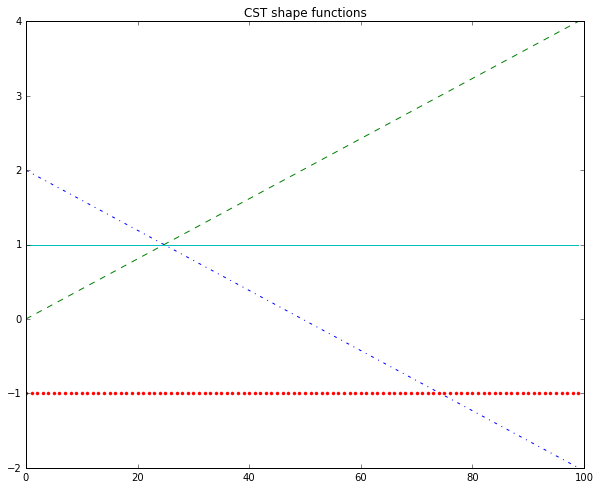

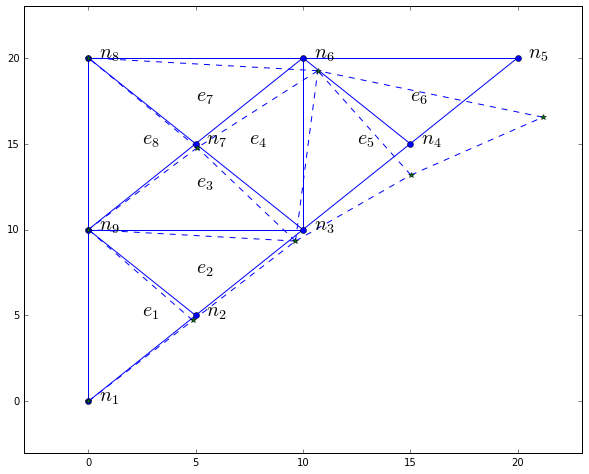

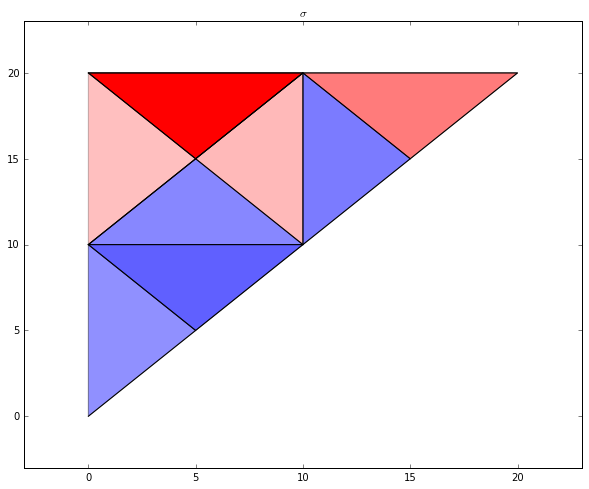

In [87]:
from mechpy.fem import cst_fem
cst_fem(structure='9node')

## Triangular mesh 

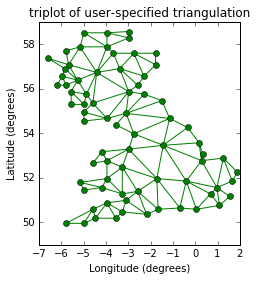

In [5]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import math
%matplotlib inline

'''
You can specify your own triangulation rather than perform a Delaunay
triangulation of the points, where each triangle is given by the indices of
the three points that make up the triangle, ordered in either a clockwise or
anticlockwise manner.
'''

xy = np.asarray([
   [-0.101, 0.872], [-0.080, 0.883], [-0.069, 0.888], [-0.054, 0.890],
   [-0.045, 0.897], [-0.057, 0.895], [-0.073, 0.900], [-0.087, 0.898],
   [-0.090, 0.904], [-0.069, 0.907], [-0.069, 0.921], [-0.080, 0.919],
   [-0.073, 0.928], [-0.052, 0.930], [-0.048, 0.942], [-0.062, 0.949],
   [-0.054, 0.958], [-0.069, 0.954], [-0.087, 0.952], [-0.087, 0.959],
   [-0.080, 0.966], [-0.085, 0.973], [-0.087, 0.965], [-0.097, 0.965],
   [-0.097, 0.975], [-0.092, 0.984], [-0.101, 0.980], [-0.108, 0.980],
   [-0.104, 0.987], [-0.102, 0.993], [-0.115, 1.001], [-0.099, 0.996],
   [-0.101, 1.007], [-0.090, 1.010], [-0.087, 1.021], [-0.069, 1.021],
   [-0.052, 1.022], [-0.052, 1.017], [-0.069, 1.010], [-0.064, 1.005],
   [-0.048, 1.005], [-0.031, 1.005], [-0.031, 0.996], [-0.040, 0.987],
   [-0.045, 0.980], [-0.052, 0.975], [-0.040, 0.973], [-0.026, 0.968],
   [-0.020, 0.954], [-0.006, 0.947], [ 0.003, 0.935], [ 0.006, 0.926],
   [ 0.005, 0.921], [ 0.022, 0.923], [ 0.033, 0.912], [ 0.029, 0.905],
   [ 0.017, 0.900], [ 0.012, 0.895], [ 0.027, 0.893], [ 0.019, 0.886],
   [ 0.001, 0.883], [-0.012, 0.884], [-0.029, 0.883], [-0.038, 0.879],
   [-0.057, 0.881], [-0.062, 0.876], [-0.078, 0.876], [-0.087, 0.872],
   [-0.030, 0.907], [-0.007, 0.905], [-0.057, 0.916], [-0.025, 0.933],
   [-0.077, 0.990], [-0.059, 0.993]])
x = np.degrees(xy[:, 0])
y = np.degrees(xy[:, 1])

triangles = np.asarray([
   [67, 66,  1], [65,  2, 66], [ 1, 66,  2], [64,  2, 65], [63,  3, 64],
   [60, 59, 57], [ 2, 64,  3], [ 3, 63,  4], [ 0, 67,  1], [62,  4, 63],
   [57, 59, 56], [59, 58, 56], [61, 60, 69], [57, 69, 60], [ 4, 62, 68],
   [ 6,  5,  9], [61, 68, 62], [69, 68, 61], [ 9,  5, 70], [ 6,  8,  7],
   [ 4, 70,  5], [ 8,  6,  9], [56, 69, 57], [69, 56, 52], [70, 10,  9],
   [54, 53, 55], [56, 55, 53], [68, 70,  4], [52, 56, 53], [11, 10, 12],
   [69, 71, 68], [68, 13, 70], [10, 70, 13], [51, 50, 52], [13, 68, 71],
   [52, 71, 69], [12, 10, 13], [71, 52, 50], [71, 14, 13], [50, 49, 71],
   [49, 48, 71], [14, 16, 15], [14, 71, 48], [17, 19, 18], [17, 20, 19],
   [48, 16, 14], [48, 47, 16], [47, 46, 16], [16, 46, 45], [23, 22, 24],
   [21, 24, 22], [17, 16, 45], [20, 17, 45], [21, 25, 24], [27, 26, 28],
   [20, 72, 21], [25, 21, 72], [45, 72, 20], [25, 28, 26], [44, 73, 45],
   [72, 45, 73], [28, 25, 29], [29, 25, 31], [43, 73, 44], [73, 43, 40],
   [72, 73, 39], [72, 31, 25], [42, 40, 43], [31, 30, 29], [39, 73, 40],
   [42, 41, 40], [72, 33, 31], [32, 31, 33], [39, 38, 72], [33, 72, 38],
   [33, 38, 34], [37, 35, 38], [34, 38, 35], [35, 37, 36]])

# Rather than create a Triangulation object, can simply pass x, y and triangles
# arrays to triplot directly.  It would be better to use a Triangulation object
# if the same triangulation was to be used more than once to save duplicated
# calculations.
plt.figure()
plt.gca().set_aspect('equal')
plt.triplot(x, y, triangles, 'go-')
plt.title('triplot of user-specified triangulation')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')

plt.show()


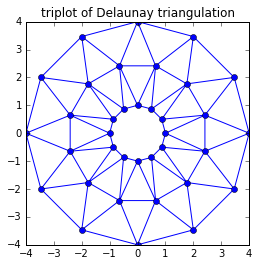

In [6]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

# Creating a Triangulation without specifying the triangles results in the
# Delaunay triangulation of the points.

# First create the x and y coordinates of the points.
n_angles = 12
n_radii = 3
min_radius = 1
radii = np.linspace(min_radius, 4, n_radii)

angles = np.linspace(0, 2*math.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += math.pi/n_angles

x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = np.where(xmid*xmid + ymid*ymid < min_radius*min_radius, 1, 0)
triang.set_mask(mask)

# Plot the triangulation.
plt.figure()
plt.gca().set_aspect('equal')
plt.triplot(triang, 'bo-')
plt.title('triplot of Delaunay triangulation')

## Linear Algebra with Python
[index](#Mechpy)  

Python's numpy package allows python, a generic computing language to perform powerful mathematical calculations. Although python's math syntax is not as obvious as MATLAB's, the functionality is comparable. This document is designed to be an intro to that syntax 

Some references

http://nbviewer.ipython.org/github/carljv/cython_testing/blob/master/cython_linalg.ipynb

We can either use scipy, which includes numpy, 
http://docs.scipy.org/doc/

or use numpy directly
http://docs.scipy.org/doc/numpy/

Since there are many ways to solve linear algebra problems, (eg Octave/Matlab, julia, scipy, numpy)
I tend to prefer the most matlabesc approaches due to the ubiquity of Matlab and the simplicity of the syntax, which frankly, python suffers with.

The major difference between arrays and matrices in python is that arrays are n-dimensions, where matrices are only up to 2-dimensions  
m

In [ ]:
import numpy as np
from scipy import linalg

Pythons list is a generic data storage object. it can be easily extended to a numpy array, which is specialized for numerical and scientific computation 

In [88]:
np.zeros((5,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [89]:
np.array([[1,2],[3,4]])

array([[1, 2],
       [3, 4]])

In [90]:
np.matrix(np.zeros((5,3)))

matrix([[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]])

In [91]:
np.matrix([[1,2],[3,4]])

matrix([[1, 2],
        [3, 4]])

In [92]:
# Matrix multiplication can be achieved using the dot method
i = [[1,0,0],[0,1,0],[0,0,1]]  # identiy matrix
a = [[4,3,1],[5,7,2],[2,2,2]]
np.dot(i,a)


array([[4, 3, 1],
       [5, 7, 2],
       [2, 2, 2]])

In [93]:
#Or, matrix multiplication can be done if a matrix is explicitly defined
np.matrix(i)*np.matrix(a)

matrix([[4, 3, 1],
        [5, 7, 2],
        [2, 2, 2]])

In [94]:
# Notice, when arrays are mutliplied, we get the dot product 
np.array(i)*np.array(a)

array([[4, 0, 0],
       [0, 7, 0],
       [0, 0, 2]])

In [95]:
# convert an array to a matrix
m = np.matrix(a)
m

matrix([[4, 3, 1],
        [5, 7, 2],
        [2, 2, 2]])

In [96]:
m.T  # transpose

matrix([[4, 5, 2],
        [3, 7, 2],
        [1, 2, 2]])

In [97]:
m.I  # inverse

matrix([[ 0.55555556, -0.22222222, -0.05555556],
        [-0.33333333,  0.33333333, -0.16666667],
        [-0.22222222, -0.11111111,  0.72222222]])

In [98]:
m**2

matrix([[33, 35, 12],
        [59, 68, 23],
        [22, 24, 10]])

In [99]:
np.array(a)**2

array([[16,  9,  1],
       [25, 49,  4],
       [ 4,  4,  4]])

In [102]:
m

matrix([[4, 3, 1],
        [5, 7, 2],
        [2, 2, 2]])

In [103]:
m[:,2]

matrix([[1],
        [2],
        [2]])

In [104]:
m[2,:]

matrix([[2, 2, 2]])

In [105]:
m[:2,:2]

matrix([[4, 3],
        [5, 7]])

In [107]:
m[1:,1:]

matrix([[7, 2],
        [2, 2]])

## Sympy Linear Algebra

In [4]:
# import sympy
import sympy as sp
#from sympy.mpmath import *

In [5]:
x = sp.Symbol('x')   # x = var('x')
M = sp.Matrix([[2,x],[x,3]])
M

⎡2  x⎤
⎢    ⎥
⎣x  3⎦

In [4]:
M.eigenvals()

⎧     __________            __________       ⎫
⎪    ╱    2                ╱    2            ⎪
⎨  ╲╱  4⋅x  + 1    5     ╲╱  4⋅x  + 1    5   ⎬
⎪- ───────────── + ─: 1, ───────────── + ─: 1⎪
⎩        2         2           2         2   ⎭

In [6]:
M.eigenvects()

⎡⎛     __________                              ⎞  ⎛   __________              
⎢⎜    ╱    2                                   ⎟  ⎜  ╱    2                   
⎢⎜  ╲╱  4⋅x  + 1    5     ⎡⎡       -x        ⎤⎤⎟  ⎜╲╱  4⋅x  + 1    5     ⎡⎡   
⎢⎜- ───────────── + ─, 1, ⎢⎢─────────────────⎥⎥⎟, ⎜───────────── + ─, 1, ⎢⎢───
⎢⎜        2         2     ⎢⎢   __________    ⎥⎥⎟  ⎜      2         2     ⎢⎢   
⎢⎜                        ⎢⎢  ╱    2         ⎥⎥⎟  ⎜                      ⎢⎢   
⎢⎜                        ⎢⎢╲╱  4⋅x  + 1    1⎥⎥⎟  ⎜                      ⎢⎢  ╲
⎢⎜                        ⎢⎢───────────── - ─⎥⎥⎟  ⎜                      ⎢⎢- ─
⎢⎜                        ⎢⎢      2         2⎥⎥⎟  ⎜                      ⎢⎢   
⎢⎜                        ⎢⎢                 ⎥⎥⎟  ⎜                      ⎢⎢   
⎣⎝                        ⎣⎣        1        ⎦⎦⎠  ⎝                      ⎣⎣   

                  ⎞⎤
                  ⎟⎥
     -x         ⎤⎤⎟⎥
────────────────⎥⎥⎟⎥
  __________    ⎥⎥⎟⎥
 ╱    2         ⎥⎥⎟⎥
╱  4

In [7]:
M.eigenvects()[1][0]

   __________    
  ╱    2         
╲╱  4⋅x  + 1    5
───────────── + ─
      2         2

In [8]:
Mval = M.eigenvects()[1][0]
Mval.evalf(subs={x:3.14})

5.67955971794838

In [10]:
print(sp.latex(M))

\left[\begin{matrix}2 & x\\x & 3\end{matrix}\right]


copy and paste into markdown 

$ \left[\begin{matrix}2 & x\\x & 3\end{matrix}\right] $


## Signal Processing
Page 174 Introduction for python for Science - David Pine

In [11]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
width = 2.0
freq = 0.5
t = np.linspace(-10, 10, 101) # linearly space time array
g = np.exp(-np.abs(t)/width)*np.sin(2.0 * np.pi * freq * t)
dt = t[1]-t[0] # increment between times in time array
G = fftpack.fft(g) # FFT of g
f = fftpack.fftfreq(g.size, d=dt) # frequenies f[i] of g[i]
f = fftpack.fftshift(f) # shift frequencies from min to max
G = fftpack.fftshift(G) # shift G order to coorespond to f
fig = plt.figure(1, figsize=(8,6), frameon=False)
ax1 = fig.add_subplot(211)
ax1.plot(t, g)
ax1.set_xlabel('t')
ax1.set_ylabel('g(t)')
ax2 = fig.add_subplot(212)
ax2.plot(f, np.real(G), color='dodgerblue', label='real part')
ax2.plot(f, np.imag(G), color='coral', label='imaginary part')
ax2.legend()
ax2.set_xlabel('f')
ax2.set_ylabel('G(f)')
plt.show()

# Design

## Factors of Safety

DLL, Design Limit Load = max force or moment expected during a mission with a given statistical probability  

Al, Allowable =  allowed minimum applied load or strength of a structure at a given statistical probablity  

FS, factor of safety [1, $\infty$] = a factor applied to a DLL to decrease the chance of failure, typically around 1-3  

KD, knockdown (0,1] = a percentage reduction of Allowable load to reduce the chance of failure

A KD=0.8 would be applied to the allowable to reduce it by 20%, $Al_{new}=Al_{old}*KD$   

MS, margin of safety = a measure of reserve strength , how much applied loda can increase before the safety of the vehicle is comprimised. $ MS\geq0$ for a good design, $MS=\frac{Allowable}{DLL*FS}-1$

For example with a $FS=1.15$, $DLL=80$, $Al=100$, we have a margin of $MS=\frac{100}{80*1.15}-1=\frac{100}{92}-1=0.087$ which is passing our design checks based on the expected max load of 80

Lets Assume a knockdown of 27%, so $K=1-0.27=0.73$  

$$
FS = \frac{1}{K}
$$


We can also say we have a $FS = \frac{1}{0.73}=1.3699$

$$
\sigma_{design}=\frac{\sigma_{ult}}{FS} = \sigma_{ult}*K
$$


# Engineering Mathematics with Python
[index](#Mechpy)

In [3]:
from numpy import *

In [4]:
r_[1:11]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
arange(1,11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [9]:
linspace(1,10,10)

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

## Functions
[index](#Index) 

In [28]:
import sympy as sp
s,ed = sp.symbols('s,ed')
K = sp.Function('K')

Ked = 0.4*ed+.2
Ks = 0.105*s+0.63 

Ktot = Ked*Ks
sp.expand(Ktot)

In [29]:
Ktot = sp.lambdify((ed,s), (0.4*ed+.2)*(0.105*s+0.63))
K(2,3.54)

In [30]:
di,df,t = sp.symbols('d_i,d_f,t')

In [31]:
from sympy.utilities.lambdify import lambdify, implemented_function

In [32]:
sb = implemented_function(sp.Function('sb'), lambda di,t: 11445*(di/t)**3 -70429*(di/t)**2 + 145552*(di/t)  )

In [33]:
Kdt = implemented_function(sp.Function('Kdt'), \
                           lambda di,t,df: 11445/sb(di, t)*(df/t)**3 - \
                           70429/sb(di, t)*(df/t)**2 + 145552/sb(di, t)*(df/t)  )

In [34]:
Kdt(0.1875, 0.25, 0.246)

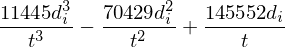

In [35]:
sb = sp.Function('sb')
sb = 11445*(di/t)**3 -70429*(di/t)**2 + 145552*(di/t)
sb

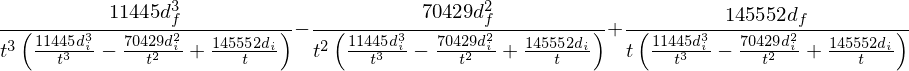

In [36]:
Kdt = sp.Function('Kdt')
Kdt = 11445/sb*(df/t)**3 - 70429/sb*(df/t)**2 + 145552/sb*(df/t)
Kdt

In [37]:
Kdt = sp.simplify(Kdt)

In [38]:
sp.latex(Kdt)

'\\frac{d_{f} \\left(11445 d_{f}^{2} - 70429 d_{f} t + 145552 t^{2}\\right)}{d_{i} \\left(11445 d_{i}^{2} - 70429 d_{i} t + 145552 t^{2}\\right)}'

C:\Users\ngordon\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:33: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
C:\Users\ngordon\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:34: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


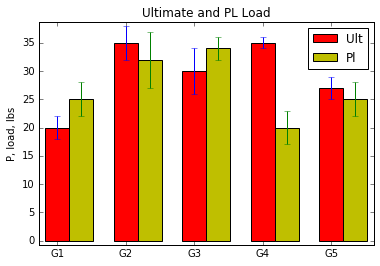

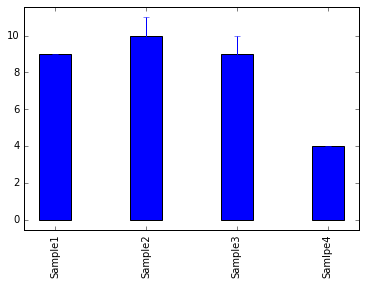

In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()

N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

Pult = (20, 35, 30, 35, 27)
Pultstd = (2, 3, 4, 1, 2)
rects1 = ax.bar(ind, Pult, width, color='r', yerr=Pultstd)

Ppl = (25, 32, 34, 20, 25)
Pplstd = (3, 5, 2, 3, 3)
rects2 = ax.bar(ind + width, Ppl, width, color='y', yerr=Pplstd)

# add some text for labels, title and axes ticks
ax.set_ylabel('P, load, lbs')
ax.set_title('Ultimate and PL Load')
ax.set_xticks(ind + width/2)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
ax.legend(['Ult','Pl'])
ax.margins(0.02)


### OR

fig, ax = plt.subplots()
barwidth = 0.35       # the width of the bars
specimenNames = ['Sample1', 'Sample2', 'Sample3', 'Samlpe4']
x = np.arange(4)
y = np.random.random_integers(1, 10 ,len(x))
e = np.random.random_integers(0,1,len(x))
ax.bar(x,y, width=barwidth, yerr=e)
ax.set_xticks(x)
plt.xticks(x+barwidth/2, specimenNames, rotation='vertical')
plt.margins(0.05)
#ax.margins(0.05)
plt.show()

## Raw Test Data

In [56]:
import pandas as pd
import numpy as np
import glob as gb
from matplotlib.pyplot import *
%matplotlib inline

csvdir='./examples/'

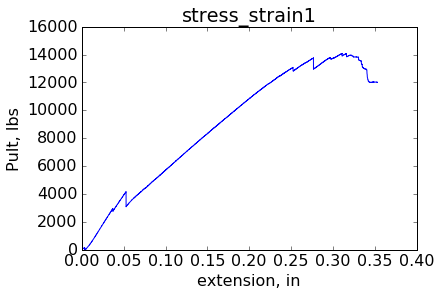

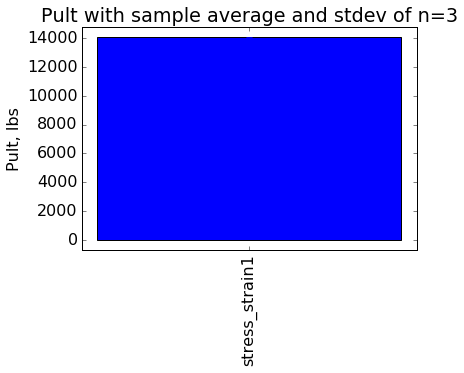

In [70]:
e=[]
y=[]

for s in specimen:
    files = gb.glob(csvdir + '*.csv')  # select all csv files
    fig, ax = subplots()
    title(s)
    Pult = []
    
    for f in files:
        d1 = pd.read_csv(f, skiprows=1)
        d1 = d1[1:]  # remove first row of string
        d1.columns = ['t', 'load', 'ext']  # rename columns
        d1.head()
        # remove commas in data
        for d in d1.columns:
            #d1.dtypes
            d1[d] = d1[d].map(lambda x: float(str(x).replace(',','')))
        Pult.append(np.max(d1.load))
        plot(d1.ext, d1.load)   
        ylabel('Pult, lbs')
        xlabel('extension, in')
        
        
    e.append(np.std(Pult))
    y.append(np.average(Pult)     )
    show()


# bar chart 
barwidth = 0.35       # the width of the bars

fig, ax = subplots()
x = np.arange(len(specimen))
ax.bar(x,  y, width=barwidth, yerr=e)

#ax.set_xticks(x)
xticks(x+barwidth/2, specimen, rotation='vertical')
title('Pult with sample average and stdev of n=3')
ylabel('Pult, lbs')
margins(0.05)
show()

## Finding the "first" peak and delta-10 threshhold limit on force-displacement data

 http://nbviewer.jupyter.org/github/demotu/BMC/blob/master/notebooks/DataFiltering.ipynb

number of data points = 42124


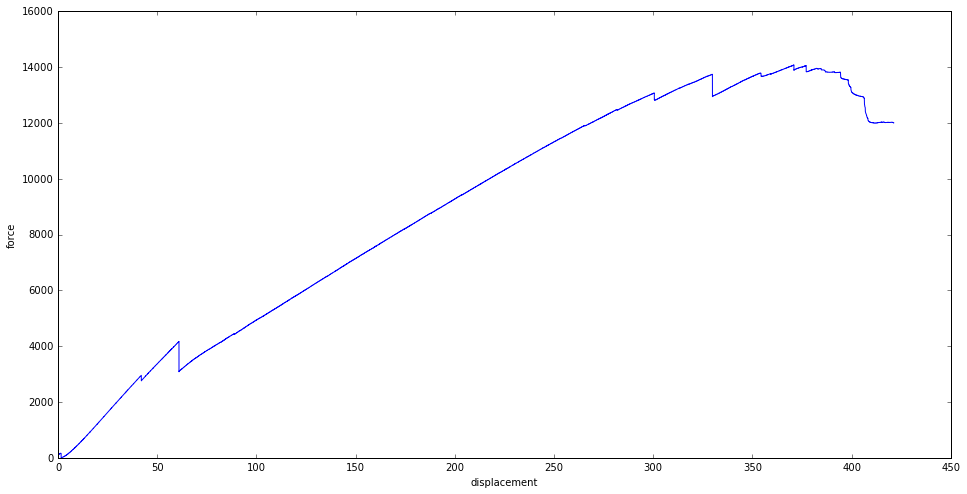

In [78]:

%matplotlib inline
from scipy import signal
from pylab import plot, xlabel, ylabel, title, rcParams, figure
import numpy as np
pltwidth = 16
pltheight = 8
rcParams['figure.figsize'] = (pltwidth, pltheight)

csv = np.genfromtxt('./examples/stress_strain1.csv', delimiter=",")
disp = csv[:,0]
force = csv[:,1]
print('number of data points = %i' % len(disp))

def moving_average(x, window):
    """Moving average of 'x' with window size 'window'."""
    y = np.empty(len(x)-window+1)
    for i in range(len(y)):
        y[i] = np.sum(x[i:i+window])/window
    return y

plt1 = plot(disp, force);
xlabel('displacement');
ylabel('force');


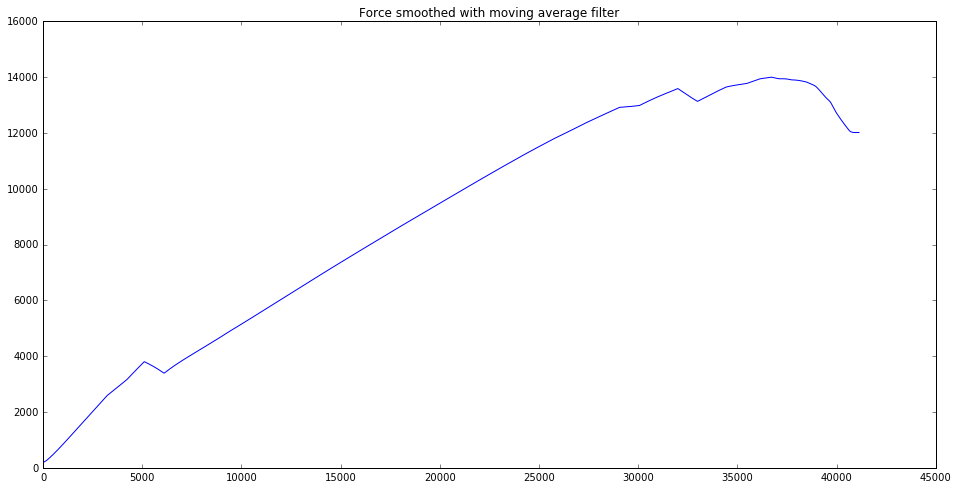

In [79]:
figure()
mywindow = 1000  # the larger the filter window, the more agressive the filtering
force2 = moving_average(force, mywindow)
x2 = range(len(force2))
plot(x2,  force2);
title('Force smoothed with moving average filter');

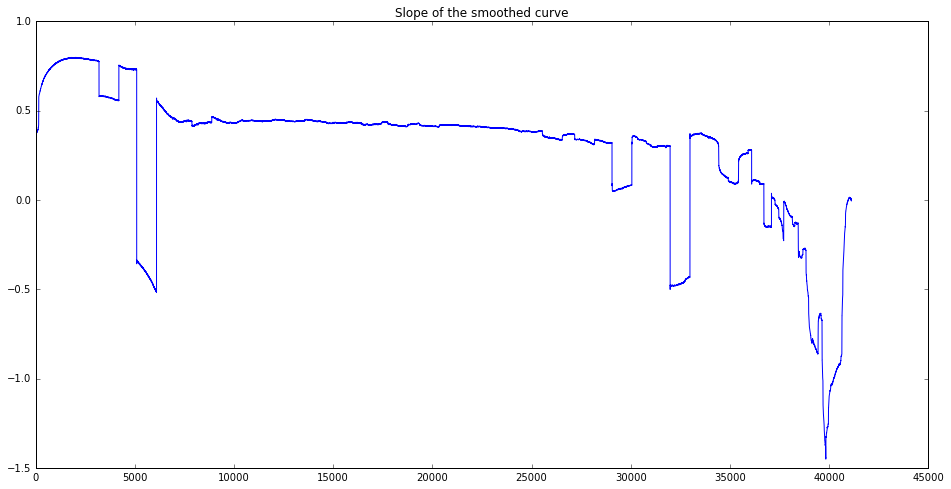

In [81]:

# Find f' using diff to find the first intersection of the 0

# mvavgforce = mvavgforce[:len(mvavgforce)/2]
force2p = np.diff(force2)
x2p = range(len(force2p))
plot(x2p, force2p);
title('Slope of the smoothed curve')

In [82]:
i = np.argmax(force2p<0)     
### or
# i = where(force2p<0)[0][0]
#### or
# for i, f in enumerate(force2p):
#     if f < 0:
#         break

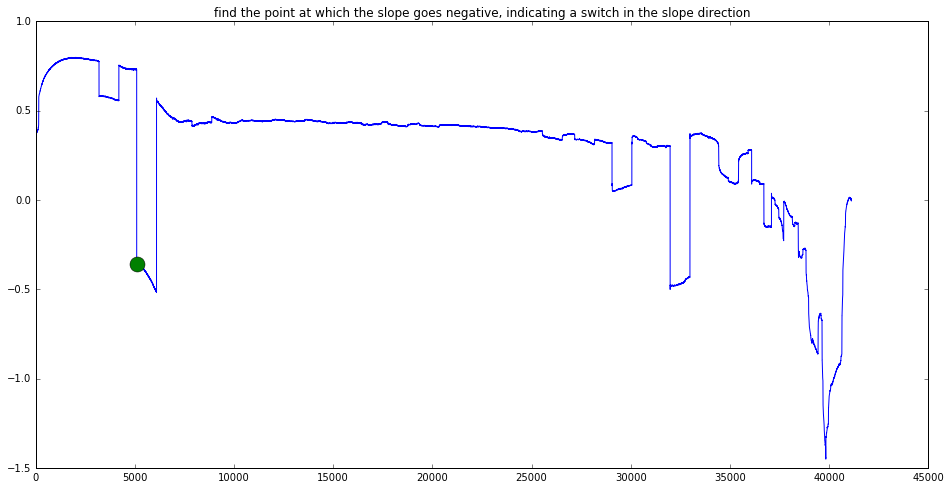

In [83]:
plot(x2p,  force2p, i,force2p[i],'o', markersize=15);
title('find the point at which the slope goes negative, indicating a switch in the slope direction');

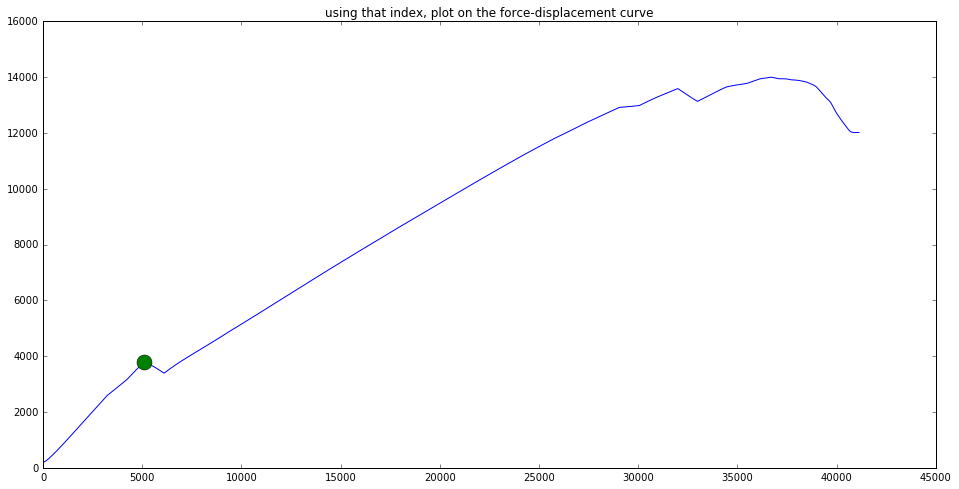

In [84]:
plot(x2,  force2, i,force2[i],'o',markersize=15);
title('using that index, plot on the force-displacement curve');

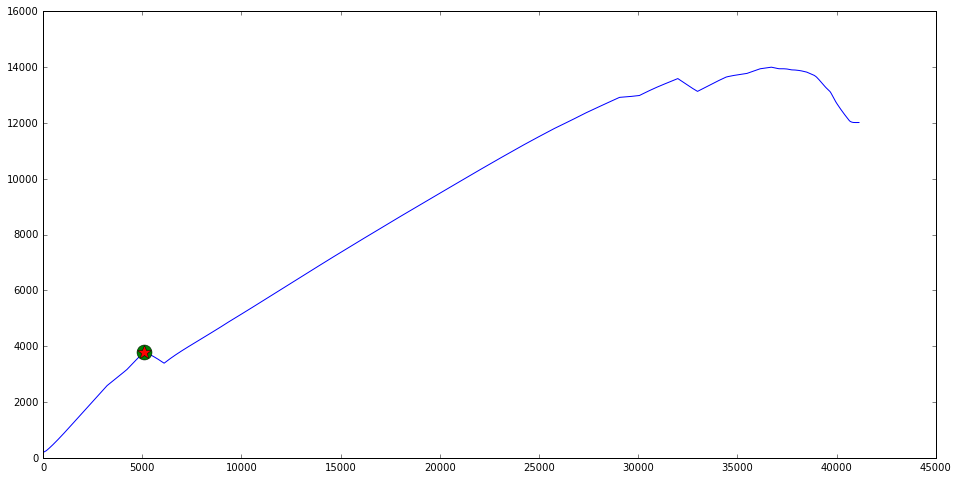

In [86]:
#Now, we need to find the next point from here that is 10 less.
delta = 1

i2 = np.argmax(force2[i]-delta > force2[i:])

# If that point does not exist on the immediate downward sloping path, 
#then just choose the max point. In this case, 10 would exist very 
#far away from the point and not be desireable
if i2 > i:
    i2=0
plot(x2,  force2, i,force2[i],'o', i2+i, force2[i2+i] ,'*', markersize=15);

In [65]:
### Copy and past data into python

y = '''62606.53409
59989.34659
62848.01136
80912.28693
79218.03977
81242.1875
59387.27273
59795.68182
58303.18182
81184.09091
71876.81818
72904.77273
115563.9205
113099.7869
106939.2756
58758.11688
57349.02597
52614.77273
72899.75649
68424.51299
73514.28571
75549.83766
84867.69481
79881.41234
55882.71104
54156.54221
58260.71429
73027.5974
69470.69805
66843.99351
82758.44156
81647.72727
77519.96753'''
y = [float(x) for x in np.array(y.replace('\n',',').split(','))]
print(y, end=" ")

[62606.53409, 59989.34659, 62848.01136, 80912.28693, 79218.03977, 81242.1875, 59387.27273, 59795.68182, 58303.18182, 81184.09091, 71876.81818, 72904.77273, 115563.9205, 113099.7869, 106939.2756, 58758.11688, 57349.02597, 52614.77273, 72899.75649, 68424.51299, 73514.28571, 75549.83766, 84867.69481, 79881.41234, 55882.71104, 54156.54221, 58260.71429, 73027.5974, 69470.69805, 66843.99351, 82758.44156, 81647.72727, 77519.96753] 

## Curve Fitting


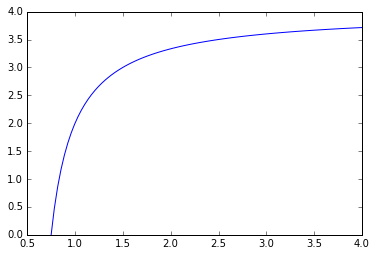

In [66]:
from pylab import *
%matplotlib inline

eps = 1e-16
xp = 0.5
yp = 4
x = linspace(xp,4,100)
y = -1/(x-xp+eps)+yp

plot(x,y)
ylim([0,yp])
show()

Optimization terminated successfully.
         Current function value: 0.190993
         Iterations: 93
         Function evaluations: 179
[ 0.46513447  3.8637857 ]


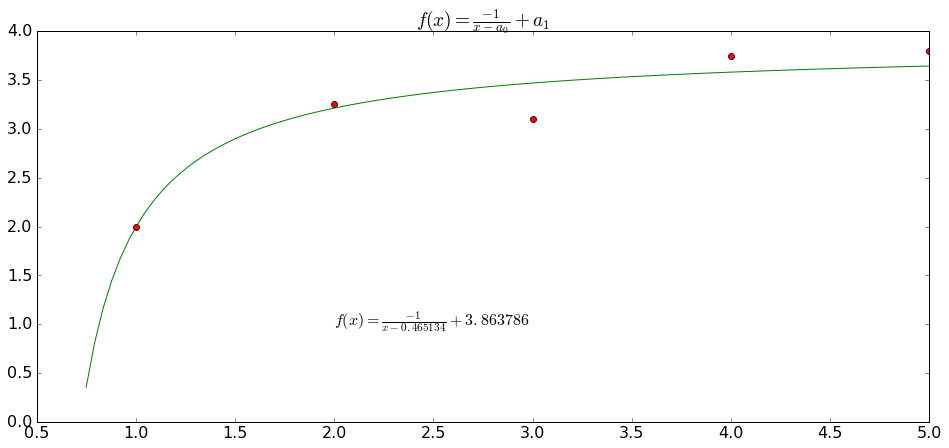

In [67]:
import scipy
from scipy.optimize import fmin
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

plt.figure(figsize=(16,7))
mpl.rcParams['font.size'] = 16

X = np.array([1, 2,    3,   4 ,    5 ])
Y = np.array([2, 3.25, 3.1, 3.75 , 3.8])

# a[0] is the x asymptote and a[1] is the y asymptote and 
fn = lambda a: -1/(X-a[0]) + a[1]
Sn = lambda x: np.sum( (fn(x)-Y)**2 )

A = scipy.optimize.fmin(func=Sn, x0=[0,0])
print(A)
plt.plot(X, Y,'o')
xplot = np.linspace(0.75 , 5,100)
fnfit = lambda x,a: -1/(x-a[0]) + a[1]

plt.plot(xplot, fnfit(xplot, A))
plt.plot(X, Y,'o')
plt.title(r'$f(x)=\frac{-1}{x-a_0}+a_1$')
plt.text(2,1,r'$f(x)=\frac{-1}{x-%f}+%f$' % (A[0], A[1]))

# Units
[index](#Mechpy)

In [155]:
from mechunits import uc1
# uc1 uses sympy

In [156]:
uc1(1.0,'psi','kPa')

1.00 psi = 6.89  kPa 


In [157]:
uc1(1.0,'newton','pound')

1.00 newton = 0.22  pound 


In [161]:
from mechunits import uc2
# uses pint
uc2(17.5,'lbf','newton')

17.5 lbf = 77.84387826705874 newton


<Quantity(77.84387826705874, 'newton')>

In [162]:
uc2(300,'pascal','psi')

300 pascal = 0.043511321319062775 psi


<Quantity(0.043511321319062775, 'psi')>

In [160]:
from mechunits import in_mm
in_mm()

     0 in - 0.000000 in - 0.000000 mm 
  1/16 in - 0.062500 in - 1.587500 mm 
   1/8 in - 0.125000 in - 3.175000 mm 
  3/16 in - 0.187500 in - 4.762500 mm 
   1/4 in - 0.250000 in - 6.350000 mm 
  5/16 in - 0.312500 in - 7.937500 mm 
   3/8 in - 0.375000 in - 9.525000 mm 
  7/16 in - 0.437500 in - 11.112500 mm 
   1/2 in - 0.500000 in - 12.700000 mm 
  9/16 in - 0.562500 in - 14.287500 mm 
   5/8 in - 0.625000 in - 15.875000 mm 
 11/16 in - 0.687500 in - 17.462500 mm 
   3/4 in - 0.750000 in - 19.050000 mm 
 13/16 in - 0.812500 in - 20.637500 mm 
   7/8 in - 0.875000 in - 22.225000 mm 
 15/16 in - 0.937500 in - 23.812500 mm 
     1 in - 1.000000 in - 25.400000 mm 


In [1]:
%load_ext version_information

In [2]:
%version_information pydy, numpy, scipy, matplotlib

Software versions
Python 2.7.11 64bit [MSC v.1500 64 bit (AMD64)]
IPython 4.0.3
OS Windows 10 10.0.10586
pydy 0.3.1
numpy 1.10.1
scipy 0.16.0
matplotlib 1.5.1
Sun Jan 31 19:55:35 2016 Pacific Standard Time